(400, 640)
V:
7.85827646186
7.90952926689
7.98707230247
7.96786903273
7.86237124503
7.97412921714
7.64548003527
7.83404573423
7.97129740689



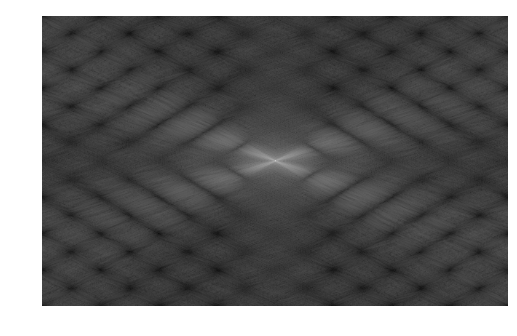

In [1]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
# %matplotlib inline

letter_list = ['S', 'T', 'V']
k_number_of_images = 10
# get dummy image
avg_img = io.imread('S1.GIF')

# convert to np.array so that we can compute the average  
avg_img_array = np.array(avg_img, dtype=float)
print(avg_img_array.shape)


# 640 x 400 pixels
for letter in letter_list[2]:
    # reset np.array
    avg_img_array.fill(0)
    print(letter + ":")
    for image_index in range(1, k_number_of_images):
        image_name = letter + str(image_index) + '.GIF'
        f = io.imread(image_name)   # read in image

        f_f = np.array(f, dtype=float)
        z = np.fft.fft2(f_f)           # do fourier transform
        q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre

        Magq =  np.absolute(q)         # magnitude spectrum
        log_Magq = np.log(Magq + 1)
        log_Magq_array = np.array(log_Magq, dtype=float)
        
        for idx, pixel in enumerate(log_Magq_array):
            avg_img_array[idx] += pixel
        
        
        Phaseq = np.angle(q)           # phase spectrum

        image_avg_pixel_val = np.mean(log_Magq)
        print(image_avg_pixel_val)
        
    avg_img_array /= k_number_of_images
    
    print()

fig1 = plt.figure()
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:b
ax1.imshow( avg_img_array, cmap='gray' ) # io.

# fig1 = plt.figure()
# ax1  = fig1.add_subplot( 111 )
# ax1.axis('off')
# Usually for viewing purposes:
# ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

# w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
#
# fig2 = plt.figure()
# ax2  = fig2.add_subplot( 111 )
# ax2.axis('off')
# ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

400 640


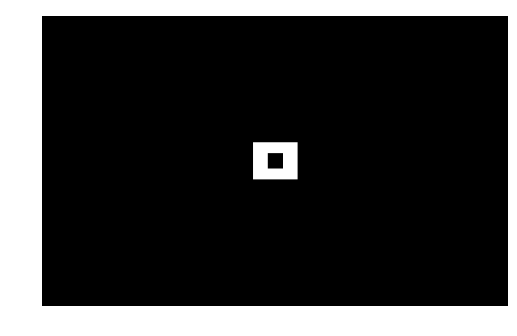

In [14]:
def box_filter( image_array, height, width, inner_height, inner_width ):
    filter_image_array = np.array(image_array, dtype=float)
    filter_image_array.fill(0)
    rows = image_array.shape[0]
    cols = image_array.shape[1]
    print(rows, cols)
    center = ( int(rows / 2), int(cols / 2) )
    top_left     = ( center[0] - int(height / 2), center[1] - int(width / 2) )
    bottom_right = ( center[0] + int(height / 2), center[1] + int(width / 2) )
    
    inner_top_left     = ( center[0] - int(inner_height / 2), center[1] - int(inner_width / 2) )
    inner_bottom_right = ( center[0] + int(inner_height / 2), center[1] + int(inner_width / 2) )

    for row in range(rows):
        if not (top_left[0] <= row and row <= bottom_right[0]):
            continue
        for col in range(cols):
            if top_left[1] <= col and col <= bottom_right[1]:
                if not (inner_top_left[1] <= col and col <= inner_bottom_right[1]) \
                    or (not (inner_top_left[0] <= row and row <= inner_bottom_right[0])):
                        filter_image_array[row][col] = True
                   
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis('off')
    # Usually for viewing purposes:b
    ax1.imshow( filter_image_array, cmap='gray' ) # io.
    plt.show()
    

box_filter( avg_img_array, 50, 60, 20, 20 )

400 640
(200, 320)
134.536240471


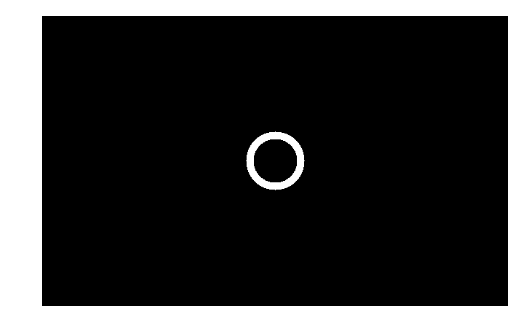

In [13]:
def ring_filter( image_array, radius_outter, radius_inner ):
    filter_image_array = np.array(image_array, dtype=float)
    filter_image_array.fill(0)
    rows = image_array.shape[0]
    cols = image_array.shape[1]
    print( rows, cols )
    center = ( int(rows / 2), int(cols / 2) )
    print( center )
    
    print(np.linalg.norm([100, 230] - np.asarray(center)))
    
    for row in range(rows):
        if not (center[0] - radius_outter <= row and row <= center[0] + radius_outter):
            continue
        for col in range(cols):
            if center[1] - radius_outter <= col and col <= center[1] + radius_outter:
                if np.linalg.norm([row, col] - np.asarray(center)) <= radius_outter:
                    if radius_inner <= np.linalg.norm([row, col] - np.asarray(center)):
                        filter_image_array[row][col] = True

    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis('off')
    # Usually for viewing purposes:b
    ax1.imshow( filter_image_array, cmap='gray' ) # io.
    plt.show()
    
ring_filter( avg_img_array, 40, 30 )